In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten, BatchNormalization, Activation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
!tar -xvzf crop_part1.tar.gz

Streaming output truncated to the last 5000 lines.
crop_part1/14_0_0_20170110224441502.jpg.chip.jpg
crop_part1/62_0_2_20170104212649180.jpg.chip.jpg
crop_part1/24_1_3_20170104222905601.jpg.chip.jpg
crop_part1/43_0_1_20170104185752431.jpg.chip.jpg
crop_part1/18_1_4_20170103222943622.jpg.chip.jpg
crop_part1/29_1_4_20170103230119816.jpg.chip.jpg
crop_part1/1_0_2_20161219212648582.jpg.chip.jpg
crop_part1/2_0_2_20161219222111287.jpg.chip.jpg
crop_part1/65_0_0_20170111203730182.jpg.chip.jpg
crop_part1/24_1_3_20170104222402975.jpg.chip.jpg
crop_part1/13_0_0_20170110225438328.jpg.chip.jpg
crop_part1/24_0_0_20170104165239658.jpg.chip.jpg
crop_part1/47_1_0_20170109132641773.jpg.chip.jpg
crop_part1/2_1_2_20161219162336446.jpg.chip.jpg
crop_part1/21_0_4_20161223214827816.jpg.chip.jpg
crop_part1/60_0_0_20170109013457906.jpg.chip.jpg
crop_part1/68_1_0_20170110175345439.jpg.chip.jpg
crop_part1/52_1_0_20170110143721250.jpg.chip.jpg
crop_part1/28_1_1_20170103225945785.jpg.chip.jpg
crop_part1/5_1_1_2016

In [3]:
content_data = []
data = []

In [4]:
import os
for i in os.listdir("/content/crop_part1"):
    content= i.split("_")
    if((content[0].isnumeric()) and (content[1].isnumeric()) and (content[2].isnumeric())):
        content_data.append([content[0],content[1],content[2],os.path.join("/content/crop_part1/",i)])

In [5]:
data = pd.DataFrame(content_data,columns=["Age","Gender","Race","Filename"])

In [6]:
data.head(10)

,Age,Gender,Race,Filename
0,59,0,0,/content/crop_part1/59_0_0_20170109012750162.j...
1,1,0,2,/content/crop_part1/1_0_2_20161219204951309.jp...
2,1,0,2,/content/crop_part1/1_0_2_20161219202542596.jp...
3,1,0,0,/content/crop_part1/1_0_0_20170110205339425.jp...
4,28,0,4,/content/crop_part1/28_0_4_20170103235229669.j...
5,63,0,0,/content/crop_part1/63_0_0_20170104213529213.j...
6,6,0,3,/content/crop_part1/6_0_3_20161220222811027.jp...
7,62,1,0,/content/crop_part1/62_1_0_20170104183415429.j...
8,10,1,0,/content/crop_part1/10_1_0_20170109203357787.j...
9,36,0,0,/content/crop_part1/36_0_0_20170105172611117.j...


In [7]:
data["Race"] = data["Race"].replace({"0":"White","1":"Black","2":"Asian","3":"Indian","4":"Others"})

In [8]:
data.head(10)

,Age,Gender,Race,Filename
0,59,0,White,/content/crop_part1/59_0_0_20170109012750162.j...
1,1,0,Asian,/content/crop_part1/1_0_2_20161219204951309.jp...
2,1,0,Asian,/content/crop_part1/1_0_2_20161219202542596.jp...
3,1,0,White,/content/crop_part1/1_0_0_20170110205339425.jp...
4,28,0,Others,/content/crop_part1/28_0_4_20170103235229669.j...
5,63,0,White,/content/crop_part1/63_0_0_20170104213529213.j...
6,6,0,Indian,/content/crop_part1/6_0_3_20161220222811027.jp...
7,62,1,White,/content/crop_part1/62_1_0_20170104183415429.j...
8,10,1,White,/content/crop_part1/10_1_0_20170109203357787.j...
9,36,0,White,/content/crop_part1/36_0_0_20170105172611117.j...


In [9]:
training = []
train = []
test = []
val = []

In [10]:
training, test = train_test_split(data,test_size=0.1)

In [11]:
train, val = train_test_split(training,test_size=0.1)

In [12]:
print(train.shape)
print(val.shape)
print(test.shape)

(7920, 4)
(880, 4)
(978, 4)


In [13]:
train.head(10)

,Age,Gender,Race,Filename
6872,6,1,Others,/content/crop_part1/6_1_4_20170103233146667.jp...
76,15,0,White,/content/crop_part1/15_0_0_20170104225947233.j...
88,86,0,White,/content/crop_part1/86_0_0_20170111210513628.j...
8122,32,1,Asian,/content/crop_part1/32_1_2_20170103181041008.j...
3070,23,1,Others,/content/crop_part1/23_1_4_20170103223618431.j...
4085,2,0,Asian,/content/crop_part1/2_0_2_20161219141211674.jp...
4407,21,1,White,/content/crop_part1/21_1_0_20170109214656355.j...
3135,3,0,White,/content/crop_part1/3_0_0_20161219211053581.jp...
8406,1,0,Asian,/content/crop_part1/1_0_2_20161219203724580.jp...
2150,46,1,White,/content/crop_part1/46_1_0_20170105162245243.j...


In [14]:
test.head(10)

,Age,Gender,Race,Filename
8228,3,1,Others,/content/crop_part1/3_1_4_20161221201429017.jp...
4979,21,1,Others,/content/crop_part1/21_1_4_20170103224431735.j...
6610,29,1,Indian,/content/crop_part1/29_1_3_20170109141114301.j...
6394,39,0,White,/content/crop_part1/39_0_0_20170109133418712.j...
1019,58,0,White,/content/crop_part1/58_0_0_20170111210401778.j...
3608,85,1,Asian,/content/crop_part1/85_1_2_20170110183501116.j...
5533,20,1,Indian,/content/crop_part1/20_1_3_20170104231528577.j...
3432,82,0,Asian,/content/crop_part1/82_0_2_20170111210612356.j...
6581,51,0,White,/content/crop_part1/51_0_0_20170105173555117.j...
9722,47,0,White,/content/crop_part1/47_0_0_20170109012454632.j...


In [15]:
val.head(10)

,Age,Gender,Race,Filename
4054,86,0,White,/content/crop_part1/86_0_0_20170111210757200.j...
5754,68,1,White,/content/crop_part1/68_1_0_20170110175703443.j...
9310,18,1,Asian,/content/crop_part1/18_1_2_20170104020841204.j...
7615,25,1,White,/content/crop_part1/25_1_0_20170103181306464.j...
6193,2,0,Asian,/content/crop_part1/2_0_2_20161219212329726.jp...
1799,12,1,Asian,/content/crop_part1/12_1_2_20170109214246240.j...
2013,3,1,White,/content/crop_part1/3_1_0_20170109193452700.jp...
5760,1,0,Others,/content/crop_part1/1_0_4_20161221192555965.jp...
2538,10,0,Black,/content/crop_part1/10_0_1_20170110220507258.j...
8267,46,0,Others,/content/crop_part1/46_0_4_20170105162327242.j...


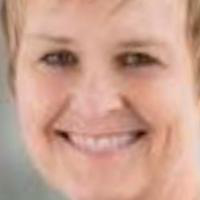

In [16]:
tf.keras.preprocessing.image.load_img(train["Filename"][2150])

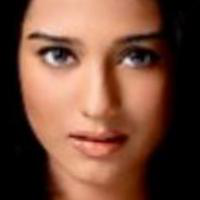

In [19]:
tf.keras.preprocessing.image.load_img(test["Filename"][5533])

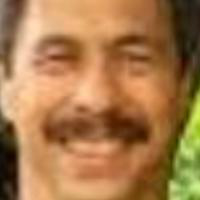

In [18]:
tf.keras.preprocessing.image.load_img(val["Filename"][8267])

In [20]:
imgdatagen = ImageDataGenerator()

In [ ]:
train_data = []
val_data = []
model = []

In [21]:
train_data = imgdatagen.flow_from_dataframe(dataframe=train,x_col="Filename",y_col="Race",class_mode="categorical",classes=["White","Black","Asian","Indian","Others"],target_size=(48,48))

Found 7920 validated image filenames belonging to 5 classes.


In [22]:
val_data = imgdatagen.flow_from_dataframe(dataframe=val,x_col="Filename",y_col="Race",class_mode="categorical",classes=["White","Black","Asian","Indian","Others"],target_size=(48,48))

Found 880 validated image filenames belonging to 5 classes.


In [23]:
test_data = imgdatagen.flow_from_dataframe(dataframe=test,x_col="Filename",y_col="Race",class_mode="categorical",classes=["White","Black","Asian","Indian","Others"],target_size=(48,48))

Found 978 validated image filenames belonging to 5 classes.


In [76]:
model = []

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(128,(3,3),input_shape=(48,48,3)))
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(5))
model.add(Activation('softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 128)       3584      
_________________________________________________________________
activation (Activation)      (None, 46, 46, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 128)       147584    
_________________________________________________________________
activation_1 (Activation)    (None, 44, 44, 128)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       147584    
_________________________________________________________________
activation_2 (Activation)    (None, 20, 20, 128)       0

In [27]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [28]:
model.fit(train_data,validation_data=val_data,epochs=20,batch_size=20,validation_steps=100,steps_per_epoch=100)

Epoch 1/20
100/100 [==============================] - 37s 43ms/step - loss: 17.9445 - accuracy: 0.4161 - val_loss: 1.1536 - val_accuracy: 0.5750
Epoch 2/20
100/100 [==============================] - 3s 30ms/step - loss: 1.1098 - accuracy: 0.5811
Epoch 3/20
100/100 [==============================] - 3s 29ms/step - loss: 1.0244 - accuracy: 0.6374
Epoch 4/20
100/100 [==============================] - 3s 30ms/step - loss: 0.9053 - accuracy: 0.6762
Epoch 5/20
100/100 [==============================] - 3s 29ms/step - loss: 0.8677 - accuracy: 0.6913
Epoch 6/20
100/100 [==============================] - 3s 30ms/step - loss: 0.7935 - accuracy: 0.7200
Epoch 7/20
100/100 [==============================] - 3s 30ms/step - loss: 0.7409 - accuracy: 0.7189
Epoch 8/20
100/100 [==============================] - 3s 30ms/step - loss: 0.6675 - accuracy: 0.7639
Epoch 9/20
100/100 [==============================] - 3s 30ms/step - loss: 0.6612 - accuracy: 0.7541
Epoch 10/20
100/100 [==========================

In [29]:
model.evaluate(test_data)

31/31 [==============================] - 1s 35ms/step - loss: 0.9121 - accuracy: 0.7168


[0.912064790725708, 0.7167689204216003]

In [ ]:
imgpred = []

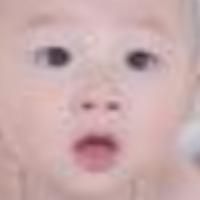

In [39]:
tf.keras.preprocessing.image.load_img(train.Filename[2155])

In [38]:
print(train.Race[2155])

Asian


In [35]:
imgpred = tf.keras.preprocessing.image.load_img(train.Filename[2155],target_size=(48,48,3))
imgpred = tf.keras.preprocessing.image.img_to_array(imgpred)
imgpred = np.expand_dims(imgpred, axis=0)

In [36]:
rslt = model.predict(imgpred)

In [37]:
np.argmax(rslt)

0

{"0":"White","1":"Black","2":"Asian","3":"Indian","4":"Others"}

/content/crop_part1/3_1_4_20161221201429017.jpg.chip.jpg


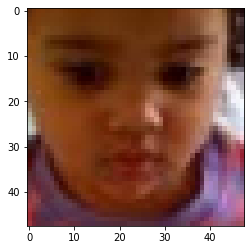

3
/content/crop_part1/21_1_4_20170103224431735.jpg.chip.jpg


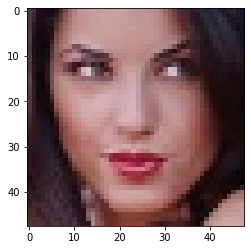

2
/content/crop_part1/29_1_3_20170109141114301.jpg.chip.jpg


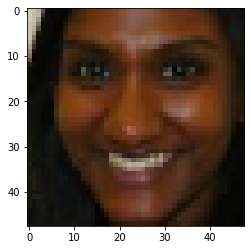

2
/content/crop_part1/39_0_0_20170109133418712.jpg.chip.jpg


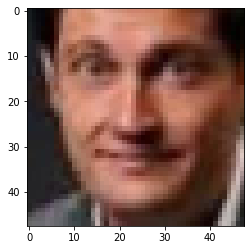

2
/content/crop_part1/58_0_0_20170111210401778.jpg.chip.jpg


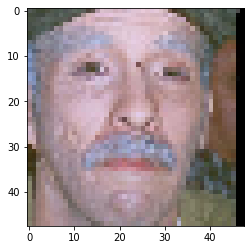

4
/content/crop_part1/85_1_2_20170110183501116.jpg.chip.jpg


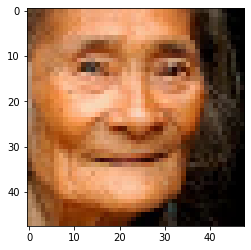

0
/content/crop_part1/20_1_3_20170104231528577.jpg.chip.jpg


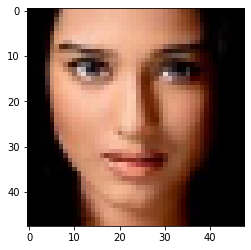

3
/content/crop_part1/82_0_2_20170111210612356.jpg.chip.jpg


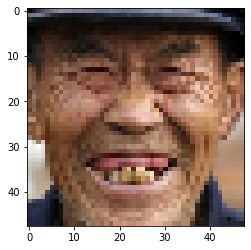

0
/content/crop_part1/51_0_0_20170105173555117.jpg.chip.jpg


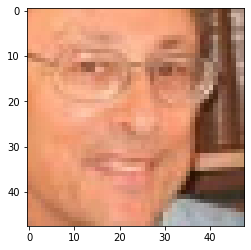

4
/content/crop_part1/47_0_0_20170109012454632.jpg.chip.jpg


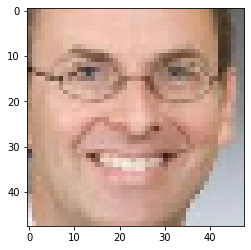

4
/content/crop_part1/23_1_0_20170103223610503.jpg.chip.jpg


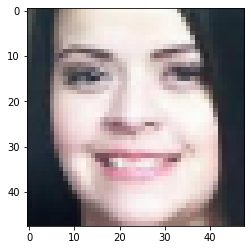

3
/content/crop_part1/31_1_0_20170103182729649.jpg.chip.jpg


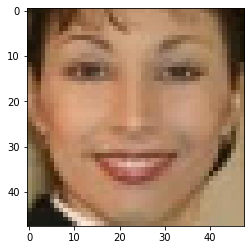

4
/content/crop_part1/59_0_0_20170104211855508.jpg.chip.jpg


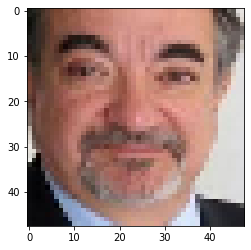

4
/content/crop_part1/52_0_0_20170111171747376.jpg.chip.jpg


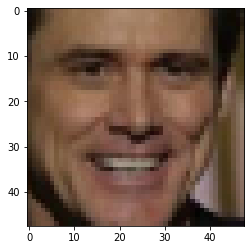

4
/content/crop_part1/3_1_2_20161219141659416.jpg.chip.jpg


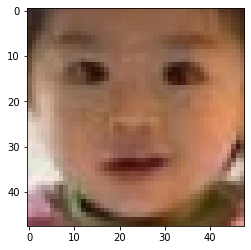

0


In [57]:
for i, row in test.head(15).iterrows():
  print(row["Filename"])
  imgpred = tf.keras.preprocessing.image.load_img(row["Filename"],target_size=(48,48,3))
  plt.imshow(imgpred)
  plt.show()
  imgpred = tf.keras.preprocessing.image.img_to_array(imgpred)
  imgpred = np.expand_dims(imgpred, axis=0)
  rslt = model.predict(imgpred)
  print(np.argmax(rslt))